In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats
import numpy as np

Salary_Data_df = pd.read_csv("DataScienceSalary.csv")
Salary_Data_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Business Data Analyst,65000,GBP,79976,ES,100,GI,L
1,2023,SE,FT,Business Intelligence Analyst,115600,USD,115600,US,0,US,M
2,2023,SE,FT,Business Intelligence Analyst,79700,USD,79700,US,0,US,M
3,2023,EN,FT,Applied Scientist,281700,USD,281700,US,0,US,M
4,2023,EN,FT,Applied Scientist,141100,USD,141100,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
8265,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
8266,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
8267,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
8268,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [38]:
# Salary Avg. by year
Salary_by_year_average = Salary_Data_df.groupby(["work_year"])["salary_in_usd"].mean().astype(np.int64)
Salary_by_year_average


work_year
2020    102250
2021     99922
2022    134508
2023    155481
Name: salary_in_usd, dtype: int64

In [39]:
# count of salaries by year
Salary_by_year_count = Salary_Data_df.groupby(["work_year"]).count()["salary_in_usd"].reset_index(name="Count")
Salary_by_year_count


,work_year,Count
0,2020,75
1,2021,218
2,2022,1650
3,2023,6327


In [40]:
#combine
Table_for_plot = pd.merge(Salary_by_year_average, Salary_by_year_count, on=["work_year"], how= "outer")
Table_for_plot

,work_year,salary_in_usd,Count
0,2020,102250,75
1,2021,99922,218
2,2022,134508,1650
3,2023,155481,6327


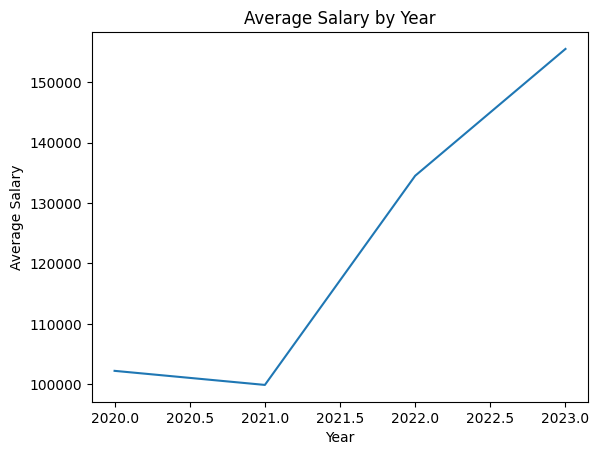

In [41]:
Salary_by_year_average.plot(title="Average Salary by Year", xlabel="Year", ylabel="Average Salary")
plt.show()


In [42]:
Experience_updated = Salary_Data_df.replace({'experience_level': {'EN':'Entry','SE':'Senior','MI': 'Mid','EX':'Executive'}})
Salary_by_level_average = Experience_updated.groupby(["experience_level"])["salary_in_usd"].mean()
Salary_by_level_average.sort_values()


experience_level
Entry         86217.694761
Mid          114572.121455
Senior       161765.174387
Executive    189792.087649
Name: salary_in_usd, dtype: float64

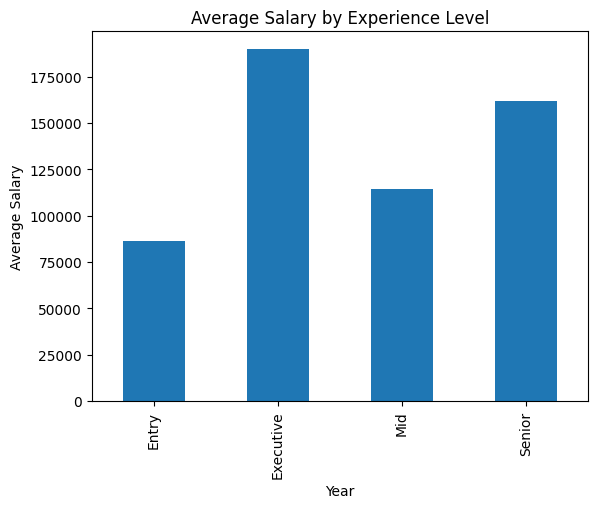

In [43]:
Salary_by_level_average.plot.bar(title="Average Salary by Experience Level", xlabel="Year", ylabel="Average Salary")
plt.show()